# 4.2 Activation Functions

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from model.model_utils import relu, relu_prime

In [11]:
# Create input values
z = np.linspace(-5, 5, 1000)

In [12]:
# For sigmoid (if you want to add it for comparison)
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of sigmoid"""
    s = sigmoid(z)
    return s * (1 - s)

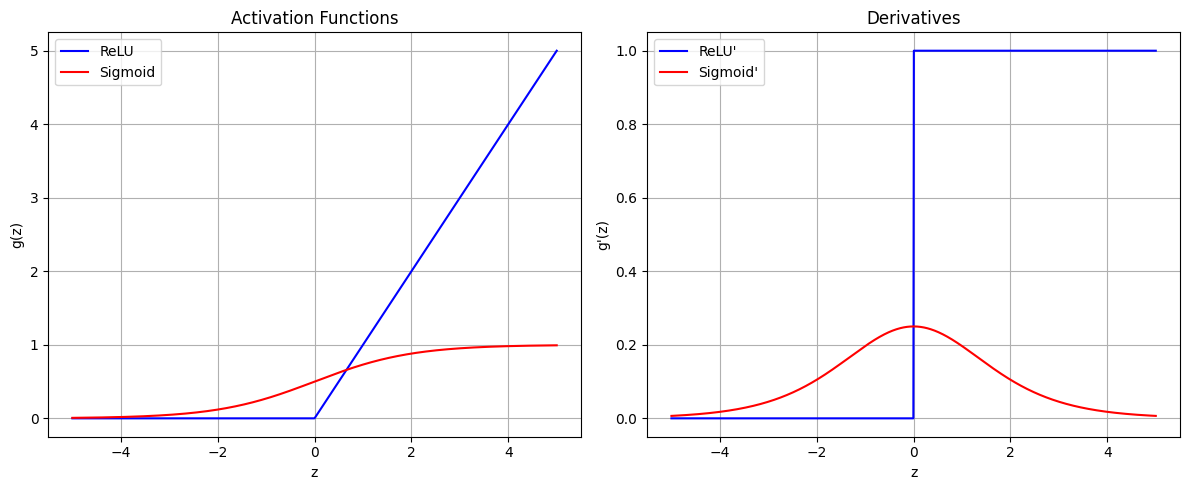

In [13]:
# Create subplots
plt.figure(figsize=(12, 5))

# Plot activation functions
plt.subplot(1, 2, 1)
plt.plot(z, relu(z), label='ReLU', color='blue')
plt.plot(z, sigmoid(z), label='Sigmoid', color='red')  # Optional comparison
plt.title('Activation Functions')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)
plt.legend()

# Plot derivatives
plt.subplot(1, 2, 2)
plt.plot(z, relu_prime(z), label="ReLU'", color='blue')
plt.plot(z, sigmoid_prime(z), label="Sigmoid'", color='red')  # Optional comparison
plt.title('Derivatives')
plt.xlabel('z')
plt.ylabel("g'(z)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Analysis of ReLU and Sigmoid Activation Functions

### Mathematical Properties and Behavior Analysis

Looking at the mathematical properties revealed in our plots, we can observe several key characteristics that directly influence the behavior of neural networks during training and inference.

The ReLU function, mathematically defined as f(x) = max(0, x), exhibits a clear non-linear transformation in our plot. For x ≤ 0, the function maintains a constant value of zero, while for x > 0, it follows the identity function f(x) = x. Its derivative, as shown in the right plot, is a step function: f'(x) = 0 for x < 0 and f'(x) = 1 for x > 0. At x = 0, the function is non-differentiable, creating a sharp "elbow" in the plot. This discontinuity in the derivative, however, doesn't pose practical problems in neural network training due to the negligible probability of inputs being exactly zero.

The sigmoid function, defined as σ(x) = 1/(1 + e^(-x)), demonstrates markedly different mathematical properties. The plot shows its characteristic S-shaped curve, bounded between 0 and 1, with a point of inflection at x = 0 where σ(0) = 0.5. Its derivative, σ'(x) = σ(x)(1 - σ(x)), reaches its maximum value of 0.25 at x = 0 and symmetrically decreases towards zero as |x| increases. This behavior is clearly visible in the derivative plot, where we can see that for inputs beyond approximately ±5, the derivative becomes extremely small (< 0.01), effectively halting learning in these regions.

### Implications for Neural Network Training

The contrasting slopes in these functions have direct implications for gradient flow during backpropagation. In ReLU, the constant derivative of 1 in the positive region means that gradients pass through unchanged, while in sigmoid, gradients are always scaled by a factor less than 0.25. This scaling effect compounds through layers: with sigmoid activation, a gradient passing through multiple layers will be repeatedly multiplied by small numbers, leading to exponential decay. This mathematical property, visible in the sigmoid's derivative plot, explains the vanishing gradient problem that often occurs in deep networks using sigmoid activation.

### Advantages and Disadvantages

ReLU's simplicity and effectiveness in preventing vanishing gradients have made it the preferred choice in modern deep learning. The derivative plot clearly shows why: the constant gradient of 1 for positive inputs ensures consistent error signal propagation, while the zero gradient for negative inputs introduces beneficial sparsity in the network's activations. This sparsity means that typically, only a subset of neurons are active for any given input, leading to more efficient representations and better generalization. However, the complete zero gradient for negative inputs can lead to "dying ReLU" problem where neurons might become permanently inactive.

The sigmoid function, despite its vanishing gradient issues, provides a smooth, bounded output range (0,1) which makes it particularly useful for problems requiring probability-like outputs. The smooth, continuous nature of both the function and its derivative ensures stable behavior during training, albeit potentially slower than ReLU. The symmetric nature of its derivative around x = 0 also provides well-behaved gradients in the middle range, though the saturation at extremes can significantly slow down learning.